# Valuation and Risk Models with Stocks

Abstract One of the most important aspects for the analysis of securities is to analyze its risk models and how to valuate the instrument. In the present chapter aims to explain the importance of risk, the different financial measures for understanding risk in a portfolio of securities and the impact on the returns of a portfolio.

Keywords Beta · Alpha · Risk · Valuation · Portfolio

This part of the book is centered on the management of risk. In this aspect, financial risk should be seen as the risk of the financial markets based on liquidity, operational and strategical risk. As seen before there are three tools for managing risk being fundamental analysis, technical analysis and quantitative analysis (Chen 2019).

Therefore, this section of the book is centered on Modern Portfolio Theory, Value at Risk and Monte Carlo Simulations. These three methods are imperative for understanding the financial markets and risk management.

## Creating a Portfolio

Managing portfolios with multiple assets is one of the most interesting processes when working on finance. Given that there are different assets which can compose a portfolio, one of the most important processes of establishing a portfolio is identifying its risk. For understanding how to build and analyze a portfolio this chapter will center on the process for creating, optimizing and evaluating a portfolio using Python.

When creating the portfolio there are different approaches that can be taken. There is always the portfolio that is created by the sentiment of the investor, the companies that they believe are the correct ones and the risk that he is willing to take. Considering risk, it depends if the investor is interested in bonds, cash, stocks or equivalents. In the case of this example, the most popular approach is to determine the market value (Bryant 2020).

The first step is to determine the companies that are performing in the index or choosing the companies that are of interest to the investor. For example, Disney, Netflix, Tesla and Amazon have been chosen. To the present time that the book was written the companies have been behaving greatly and creating strong returns.

### • Creating a Portfolio with 4 variables


In [1]:
import datetime
import pandas as pd
import yfinance as yf
import numpy as np

start=datetime.datetime(2014,1,1)
end=datetime.datetime(2019,1,1)

tickers=('NFLX','DIS','TSLA','AMZN')
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x,start,end)['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The second step then creating the portfolio is assigning the weights that the portfolio must have. For this approach, considering market capitalization is important.

### • Determining market value

To determine market value two steps are essential. To know the last price of the security traded and the number of shares outstanding. For this, it is important to have a benchmark that can be used as a reference for the securities. Since the example establishes the last price as of December 26, 2018, then the prices can be obtained as follows:



In [2]:
stocks.tail()

,NFLX,DIS,TSLA,AMZN
Date,,,,
2018-12-24,233.880005,100.349998,19.692667,67.197998
2018-12-26,253.669998,105.830002,21.739332,73.544998
2018-12-27,255.570007,106.519997,21.075333,73.082001
2018-12-28,256.079987,107.300003,22.257999,73.901001
2018-12-31,267.660004,109.650002,22.186666,75.098503


### • Calculate stocks returns

In [3]:
stocks_return=np.log(stocks/stocks.shift(1))
stocks_return

,NFLX,DIS,TSLA,AMZN
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113
2014-01-07,-0.057435,0.006835,0.015927,0.011116
2014-01-08,0.004379,-0.014780,0.012773,0.009726
...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613
2018-12-26,0.081226,0.053170,0.098877,0.090254
2018-12-27,0.007462,0.006499,-0.031020,-0.006315


### • Calculate the weights of the portfolio based on market capitalization

In [4]:
portfolio_weights = np.array([0.0538, 0.1057,0.6898,0.1506])
portfolio_weights

array([0.0538, 0.1057, 0.6898, 0.1506])

### • Create a weighted return portfolio


In [5]:
weighted_returns_portfolio=stocks_return.mul(portfolio_weights, axis= 1)
weighted_returns_portfolio.head().dropna()



,NFLX,DIS,TSLA,AMZN
Date,,,,
2014-01-03,0.000042,-0.000222,-0.002486,-0.000580
2014-01-06,-0.000526,-0.000404,-0.011909,-0.001071
2014-01-07,-0.003090,0.000722,0.010986,0.001674
2014-01-08,0.000236,-0.001562,0.008811,0.001465


### • Create a stock portfolio based on the weights assigned


In [6]:
stocks_return['Porfolio']=weighted_returns_portfolio.sum(axis= 1 ).dropna()
stocks_return

,NFLX,DIS,TSLA,AMZN,Porfolio
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,0.000000
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.003247
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.013910
2014-01-07,-0.057435,0.006835,0.015927,0.011116,0.010293
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.008949
...,...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613,-0.065215
2018-12-26,0.081226,0.053170,0.098877,0.090254,0.091788
2018-12-27,0.007462,0.006499,-0.031020,-0.006315,-0.021260


## Calculating Statistical Measures on a Portfolio

Now that the portfolio is created there are certain statistical measures that can be calculated. The first one is the portfolio standard deviation which is as follows:

Equation 1: Portfolio standard deviation

The first step is to obtain the annual covariance. For the annual covariance the number of days that will be used is 252, a more conventional approach to the 360 or 365. The days are based on the stock market available days:

### • Calculate the covariance of the stocks and the portfolio


In [7]:
stocks_covariance=stocks_return.cov()
stocks_covariance


,NFLX,DIS,TSLA,AMZN,Porfolio
NFLX,0.000726,0.000090,0.000248,0.000238,0.000256
DIS,0.000090,0.000143,0.000090,0.000080,0.000094
TSLA,0.000248,0.000090,0.000785,0.000189,0.000593
AMZN,0.000238,0.000080,0.000189,0.000378,0.000209
Porfolio,0.000256,0.000094,0.000593,0.000209,0.000464


### • Annualize the covariance

In [8]:
annualized_covariance=stocks_covariance * 252
print(annualized_covariance)
annualized_covariance=annualized_covariance.drop('Porfolio', axis=0)
annualized_covariance=annualized_covariance.drop('Porfolio', axis=1)

print(annualized_covariance)


              NFLX       DIS      TSLA      AMZN  Porfolio
NFLX      0.182957  0.022691  0.062606  0.059895  0.064447
DIS       0.022691  0.035919  0.022747  0.020226  0.023755
TSLA      0.062606  0.022747  0.197909  0.047600  0.149459
AMZN      0.059895  0.020226  0.047600  0.095284  0.052545
Porfolio  0.064447  0.023755  0.149459  0.052545  0.116895
          NFLX       DIS      TSLA      AMZN
NFLX  0.182957  0.022691  0.062606  0.059895
DIS   0.022691  0.035919  0.022747  0.020226
TSLA  0.062606  0.022747  0.197909  0.047600
AMZN  0.059895  0.020226  0.047600  0.095284


### • Obtain the standard deviation of the portfolio

In [9]:
portfolio_sd=np.sqrt(
    np.dot(portfolio_weights.T, np.dot(annualized_covariance, portfolio_weights))
    )
portfolio_sd

0.3420349374375355

The volatility of the portfolio is 34.20% with can be considered as a highly volatile portfolio. This is important because when analyzing the beta, the behavior of the market and the stock will be included into the analysis.

## The Capital Asset Pricing Model

The Capital Asset Pricing Model better known as CAPM is a model created by William Sharpe based on the work of Harry Markowitz. Its major assumptions are that the offer of financial assets is equal to the demand of financial assets (Mullins 1982). When the assumption is analyzed under perfect competitiveness, which means that the price is determined by the offer and demand of economic agents, hence determine the price of the asset.

Another important aspect of the CAPM is that it only considers the systematic risk (market risk). Systematic risk can be understood as the risk that is not diversifiable and therefore cannot be reduced (Fontinelle 2019). Risk, as a whole is divided as follows:

Equation 2: Total risk

Total Risk = systematic risk + non systematic risk

### The Beta

The measurement of the systematic risk is through the beta, which is a degree of sensitivity that includes the variation of an asset compared with an index that is used as a benchmark.

Equation 3: Beta calculation with correlation

ρim = Correlation between asset i and the market
σi = variance of asset i
σm = variance of the market

Another way of calculating the beta is through the following formula:

Given that the covariance will be obtained for calculating the beta, it is important to elaborate a covariance matrix. First, the process will be explained with the covariance formula and then it will be integrated with the correlation formula.

Before coding in Python there are certain aspects that should be clarified to understand the process of computing the beta with covariance:

- Using a for loop: The program below uses a simple for loop because there is a need here to create a DataFrame with the two variables. The process is simple, and for more information there are different ways a for loop can be used. See For loop.

- Choosing a market for comparison: For example, the S&P 500 (^GSPC) was used because it is an interesting market reference when trying to determine the behavior of the company.

- Using iloc: iloc is a pandas DataFrame function that selects a position. It can be used to slice the DataFrame or to create new columns. Please visit the chapter titled The Basics for more information.

- Using 252 days: The concept of 252 days comes from the regular trading hours (RTH). It is a rule of thumb (Mitra y Mitra 2011). The covariance and the variance are multiplied by this to convert it into daily.

These aspects are important since they will be repeated throughout the following sections of the book.

#### • Installing packages


In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


#### • Setting time and date


In [11]:
start=datetime.datetime(2014,1,1)
end=datetime.datetime(2019,1,1)
print(start)
print(end)



2014-01-01 00:00:00
2019-01-01 00:00:00


#### • Using a for loop for obtaining tickers


In [12]:
tickers=['DIS','^GSPC']
stocks=pd.DataFrame()
for x in tickers: 
    stocks[x]=yf.download(x,start,end)['Close']
stocks    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,DIS,^GSPC
Date,,
2014-01-02,76.269997,1831.979980
2014-01-03,76.110001,1831.369995
2014-01-06,75.820000,1826.770020
2014-01-07,76.339996,1837.880005
2014-01-08,75.220001,1837.489990
...,...,...
2018-12-24,100.349998,2351.100098
2018-12-26,105.830002,2467.699951
2018-12-27,106.519997,2488.830078


#### • Creating logarithmic returns


In [13]:
stocks_return=np.log(stocks/stocks.shift(1))
stocks_return

,DIS,^GSPC
Date,,
2014-01-02,NaN,NaN
2014-01-03,-0.002100,-0.000333
2014-01-06,-0.003818,-0.002515
2014-01-07,0.006835,0.006063
2014-01-08,-0.014780,-0.000212
...,...,...
2018-12-24,-0.037840,-0.027487
2018-12-26,0.053170,0.048403
2018-12-27,0.006499,0.008526


#### • Calculating the covariance matrix


In [14]:
covariance=stocks_return.cov()*252
covariance

,DIS,^GSPC
DIS,0.035919,0.015940
^GSPC,0.015940,0.017554


#### • Setting the market covariance into a variable


In [15]:
covariance_market=covariance.iloc[0,1 ]
covariance_market

0.015940065653549267

#### • Calculating the variance of the market


In [16]:
market_variance=stocks_return['^GSPC' ].var() * 252
market_variance

0.0175541712284195

#### • Calculating Beta with covariance


In [17]:
beta_Disney=covariance_market/market_variance
print('Beta de Disney =', beta_Disney)

Beta de Disney = 0.9080500267505047


For calculating the beta with correlation, the formula, it is easier but it is less common. It is important to remember that when comparing beta, the same days of data are being used, and that this is applied to all the variables. There are different approaches to the beta but the most notable aspect is to understand the result. To.

In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


#### • Setting time and date


In [19]:
start=datetime.datetime(2014,1,1)
end=datetime.datetime(2019,1,1)
print('Fecha de inicio', start)
print('Fecha final', end)

Fecha de inicio 2014-01-01 00:00:00
Fecha final 2019-01-01 00:00:00


#### • Using a for loop for obtaining tickers

In [20]:
tickers=['NFLX', '^GSPC']
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x,start,end)['Close']

stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,NFLX,^GSPC
Date,,
2014-01-02,51.831429,1831.979980
2014-01-03,51.871429,1831.369995
2014-01-06,51.367142,1826.770020
2014-01-07,48.500000,1837.880005
2014-01-08,48.712856,1837.489990
...,...,...
2018-12-24,233.880005,2351.100098
2018-12-26,253.669998,2467.699951
2018-12-27,255.570007,2488.830078


#### • Creating logarithmic returns


In [21]:
stocks_return=np.log(stocks/stocks.shift(1 ))
stocks_return

,NFLX,^GSPC
Date,,
2014-01-02,NaN,NaN
2014-01-03,0.000771,-0.000333
2014-01-06,-0.009769,-0.002515
2014-01-07,-0.057435,0.006063
2014-01-08,0.004379,-0.000212
...,...,...
2018-12-24,-0.052107,-0.027487
2018-12-26,0.081226,0.048403
2018-12-27,0.007462,0.008526


#### • Calculating correlation


In [22]:
correlation=stocks_return.corr()
correlation

,NFLX,^GSPC
NFLX,1.000000,0.467237
^GSPC,0.467237,1.000000


#### • Inserting Correlation into a variable


In [23]:
correlation_NFLX_GSPC=correlation.iloc[0,1 ]
print('La correlación es:',correlation_NFLX_GSPC)

La correlación es: 0.46723651629586505


#### • Netflix variance


In [24]:
variance_NFLX=stocks_return['NFLX' ].var()
print('La varianza de NETFLIX ES :',variance_NFLX)

La varianza de NETFLIX ES : 0.000726020198511706


#### • Market variance


In [25]:
variance_GSPC=stocks_return['^GSPC' ].var()
print('La varianza del índice de mercado es :',variance_GSPC)

La varianza del índice de mercado es : 6.965940963658532e-05


#### • Beta


In [26]:
beta_netflix=correlation_NFLX_GSPC * (variance_NFLX/variance_NFLX)
print('Beta = ',beta_netflix)

Beta =  0.46723651629586505


The beta above is annualized since the correlation is obtained by using all the data and comparing it. This is why the first formula is used more often because it is capable of representing the beta using daily information. Notice that correlation can change if the data is used daily, monthly or annually and this could lead to results that are not comparable.

The next step is to interpret the beta coefficient. The interpretation of the beta coefficient is very useful since it helps understand the relation between a security and the market it trades. This is fundamental when analyzing a portfolio because it is imperative to comprehend what happens when the market moves with a certain security that is included in the portfolio (Table 4).

The beta coefficients results:

In [27]:
print('BETA DISNEY =', beta_Disney)
print('BETA NETFLIX =', beta_netflix)

BETA DISNEY = 0.9080500267505047
BETA NETFLIX = 0.46723651629586505


Both of them are less volatile than the market, meaning that if the S&P 500 shifts in an upward direction by 1% then Disney will shift by 0.91% and Netflix by 0.46%. The beta is important for analyzing the process in which the assets behave when compared to a market.

Table 4 The Beta Table

- βi = 1 The asset is exactly as volatile as the market it is compared with

- βi > 1 The asset is more volatile than the market it is compared with

- βi < 1 > 0 The asset is less volatile than the market it is compared with

- βi = 0 The asset is not correlated with the market it is compared with

- βi < 0 Negatively correlated with the market it is compared with

## The Beta and the CAPM

The CAPM is considered part of the factor analysis because it allows the understanding of the relationship between variables. It is important to consider that when using the factor analysis, the key aspect understanding the relation of the correlated variables with the factors.

The first step for developing the CAPM is calculate the excess returns. An excess return happens when the asset or portfolio exceeds the riskfree return. The equation is as follows:

Equation 5: Excess return

    Excess Return = Return − Risk Free Return

A risk-free return can be defined as an investment that with zero risk (lowest risk possible) guarantees a return. Usually for the risk-free rate the U.S. Treasury Bills (known as T-Bills) are considered because they are backed by the U.S. Government and the risk of default is minimum.

To understand the relation between the Risk-Free Return, the Beta and the CAPM the easiest way is to understand the model by its equation:

Equation 6: Capital Asset Pricing Model

    E(Rp) − RF = βp(E(Rm) − RF)

E(Rp) − RF = The excess in the expected return of Portfolio P
E(Rm) − RF = The excess expected return of market portfolio
RF = Risk-Free Return
βp = Beta of the portfolio

According to the equation, the first step for calculating the CAPM is to create a portfolio. To create a portfolio, one must understand that it is composed of different assets and that those assets should have a different weight.

The weights are known as portfolio weights and there are different methods for calculating the weights but the example will focus on the market value method seen before.



In [28]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### • Creating a Portfolio with 4 variables

In [29]:
start=datetime.datetime(2014,1,1)
end=datetime.datetime(2019,1,1)
tickers=['NFLX','DIS','TSLA','AMZN']
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x, start, end)['Close']

print('Fecha de Inicio =', start)
print('Fecha de Fin=',end)
print('Tickers =',tickers)
print(stocks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fecha de Inicio = 2014-01-01 00:00:00
Fecha de Fin= 2019-01-01 00:00:00
Tickers = ['NFLX', 'DIS', 'TSLA', 'AMZN']
                  NFLX         DIS       TSLA       AMZN
Date                                                    
2014-01-02   51.831429   76.269997  10.006667  19.898500
2014-01-03   51.871429   76.110001   9.970667  19.822001
2014-01-06   51.367142   75.820000   9.800000  19.681499
2014-01-07   48.500000   76.339996   9.957333  19.901501
2014-01-08   48.712856   75.220001  10.085333  20.096001
...                ...         ...        ...        ...
2018-12-24  233.880005  100.349998  19.692667  67.197998
2018-12-26  253.669998  105.830002  21.739332  73.544998
2018-12-27  255.570007  106.519997  21.075333  73.082001
2018-12-28  256.079987  107.300003  22.257999  73.901001
2018-12-31  267.660004  109.650002  22.186666  75.098503

[1258 rows x 4 columns]


The second step when building a portfolio is identifying the weights that the model will consider. For this it is important to know how much money is going to be invested in the model. For this example, the investment will be of USD 500,000 and it will be distributed according to the following information (Table 5):

Table 5 Investing USD 500,000

Company                     Investment      Portfolio Weight
Telsa Inc                   130,000             26%
Netflix Inc                 100,000             20%
Amazon.com, Inc             170,000             34%
Walt Disney Company (The)   100,000             20%
Total                       500,000            100%

Considering the above, the subsequent step is to be familiar with the construction of the portfolio based on the company that is going to be chosen. One of the key aspects is that the sum of the portfolio weights has to add to a 100% or to 1 depending on if you are using decimal or percentage. This is important because of the portfolio return formula given below:

Equation 7: Portfolio Return

    Rp = Ra1wa1 + Ra2wa2 + Ra3wa3 + . . . + Ranwax

Rp = Return of the portfolio
Ra1 = Return of the first asset
wa1 = Weight of the first asset.

### • Weights for the portfolio





In [30]:
portfolio_weights = np.array([0.30, 0.20, 0.25, 0.25 ])
print('Pesos del Portafolio =', portfolio_weights)

Pesos del Portafolio = [0.3  0.2  0.25 0.25]


### • Create logarithmic returns in the portfolio

In [31]:
stocks_return=np.log(stocks/stocks.shift(1 ))
stocks_return

,NFLX,DIS,TSLA,AMZN
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113
2014-01-07,-0.057435,0.006835,0.015927,0.011116
2014-01-08,0.004379,-0.014780,0.012773,0.009726
...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613
2018-12-26,0.081226,0.053170,0.098877,0.090254
2018-12-27,0.007462,0.006499,-0.031020,-0.006315


### • Drop missing values in the series and visualize the data

In [32]:
stocks_return.dropna().head()

,NFLX,DIS,TSLA,AMZN
Date,,,,
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113
2014-01-07,-0.057435,0.006835,0.015927,0.011116
2014-01-08,0.004379,-0.014780,0.012773,0.009726
2014-01-09,-0.011622,-0.004263,-0.025101,-0.002267


### • Calculate the weighted stock returns of the portfolio

In [33]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis=1 )
weighted_returns_portfolio

,NFLX,DIS,TSLA,AMZN
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.000231,-0.000420,-0.000901,-0.000963
2014-01-06,-0.002931,-0.000764,-0.004316,-0.001778
2014-01-07,-0.017230,0.001367,0.003982,0.002779
2014-01-08,0.001314,-0.002956,0.003193,0.002431
...,...,...,...,...
2018-12-24,-0.015632,-0.007568,-0.019826,-0.006153
2018-12-26,0.024368,0.010634,0.024719,0.022563
2018-12-27,0.002239,0.001300,-0.007755,-0.001579


### • Calculating the returns of a portfolio

In [34]:
stocks_return['Portfolio' ]=weighted_returns_portfolio.sum(axis=1 )
stocks_return

,NFLX,DIS,TSLA,AMZN,Portfolio
Date,,,,,
2014-01-02,NaN,NaN,NaN,NaN,0.000000
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.002053
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.009789
2014-01-07,-0.057435,0.006835,0.015927,0.011116,-0.009103
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.003982
...,...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613,-0.049180
2018-12-26,0.081226,0.053170,0.098877,0.090254,0.082285
2018-12-27,0.007462,0.006499,-0.031020,-0.006315,-0.005795


### • Calculate the cumulative returns of the portfolio and plot them

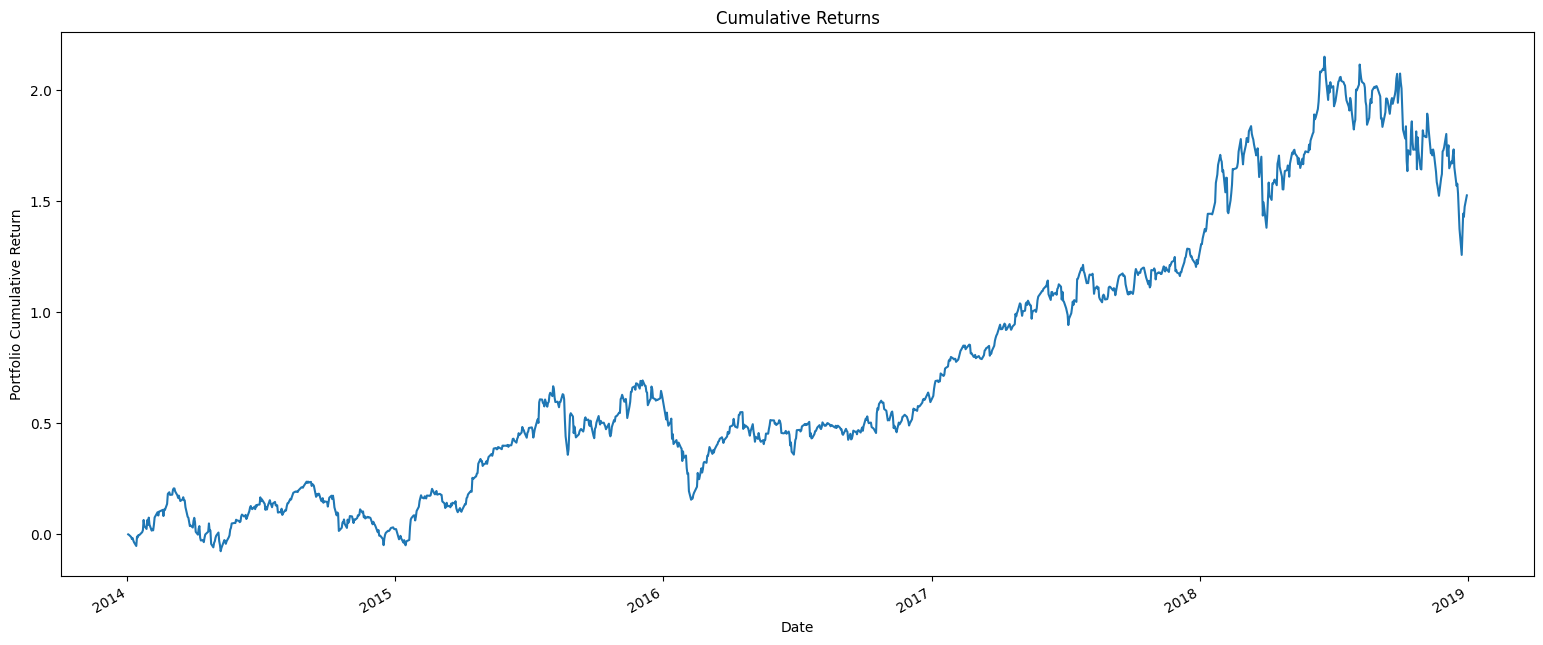

In [35]:
cumulative_returns_porfolio = ((1 + stocks_return['Portfolio' ]).cumprod()-1)
cumulative_returns_porfolio
cumulative_returns_porfolio.plot(label= 'Cumulative Returns of the Portfolio'
                                 ,figsize=(19,8)
                                 ,title='Cumulative Returns')
_=plt.xlabel('Date' )
_=plt.ylabel('Portfolio Cumulative Return' )

The example above is a perfect example for understanding the behavior of a portfolio considering four companies. As the plot above demonstrates, the portfolio went from a cumulative return of approximately 0.4 in 2015 to above 2.0 in 2018. The last part of the graph exemplifies an interesting fall considering the portfolio (Fig. 1).

As the CAPM model specifies, it is important to calculate the excess based on the difference of the Risk-Free Rate and the Portfolio Returns. To choose the risk-free rate concerning a T-Bill should be based on the duration of the investment. For example, if the portfolio that is being built is aimed at 10 years then T-Bill that is appropriate is the 10-year T-Bill.

To calculate the real risk-free rate the process is as follows:

Equation 8: Real Risk

    Real Risk − Free Rate = (Risk Free − Rate − Inflation)

At the time consulted for the present chapter, the T-Bill yield for 10 years was 2.53% and the inflation was 1.5%. The result of the real riskfree rate is 1.03%. If the model is using the real risk-free rate the column shall be added:

### • Add the real risk-free rate column



In [36]:
stocks_return['RF Rate' ]=0.0103
stocks_return

,NFLX,DIS,TSLA,AMZN,Portfolio,RF Rate
Date,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,0.000000,0.0103
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.002053,0.0103
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.009789,0.0103
2014-01-07,-0.057435,0.006835,0.015927,0.011116,-0.009103,0.0103
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.003982,0.0103
...,...,...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613,-0.049180,0.0103
2018-12-26,0.081226,0.053170,0.098877,0.090254,0.082285,0.0103
2018-12-27,0.007462,0.006499,-0.031020,-0.006315,-0.005795,0.0103


With the column of the real risk-free rate and the portfolio returns, the excess can be calculated very easy:

In [37]:
stocks_return['excess' ]=stocks_return['Portfolio' ] - stocks_return['RF Rate' ]
stocks_return

,NFLX,DIS,TSLA,AMZN,Portfolio,RF Rate,excess
Date,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,0.000000,0.0103,-0.010300
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.002053,0.0103,-0.012353
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.009789,0.0103,-0.020089
2014-01-07,-0.057435,0.006835,0.015927,0.011116,-0.009103,0.0103,-0.019403
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.003982,0.0103,-0.006318
...,...,...,...,...,...,...,...
2018-12-24,-0.052107,-0.037840,-0.079305,-0.024613,-0.049180,0.0103,-0.059480
2018-12-26,0.081226,0.053170,0.098877,0.090254,0.082285,0.0103,0.071985
2018-12-27,0.007462,0.006499,-0.031020,-0.006315,-0.005795,0.0103,-0.016095


With the information, the only variable missing for the CAPM is the beta. For this next step, the SPY (S&P 500) will be used:

### • Calculating returns for the SPY index

In [38]:
start=datetime.datetime(2014,1,2)
end=datetime.datetime(2019,1,1)
print('Fecha de Inicio = ',start)
print('Fecha de Fin=',end)
stocks_return['Market']=yf.download('SPY',start,end)['Close']
stocks_return
stocks_return['Market']=(stocks_return['Market']/stocks_return['Market'].shift(1))
stocks_return.head().dropna()

Fecha de Inicio =  2014-01-02 00:00:00
Fecha de Fin= 2019-01-01 00:00:00


[*********************100%%**********************]  1 of 1 completed


,NFLX,DIS,TSLA,AMZN,Portfolio,RF Rate,excess,Market
Date,,,,,,,,
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.002053,0.0103,-0.012353,0.999836
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.009789,0.0103,-0.020089,0.997102
2014-01-07,-0.057435,0.006835,0.015927,0.011116,-0.009103,0.0103,-0.019403,1.006142
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.003982,0.0103,-0.006318,1.000218


The second step is to calculate the excess return of the market compared with the risk-free rate. This is basic because it standardizes the process by which the market behaves compared to the risk-free rate and the portfolio.

### • Calculating the excess return of the market

In [39]:
stocks_return['excess market']=stocks_return['Market'] - stocks_return['RF Rate']
stocks_return.head().dropna()

,NFLX,DIS,TSLA,AMZN,Portfolio,RF Rate,excess,Market,excess market
Date,,,,,,,,,
2014-01-03,0.000771,-0.002100,-0.003604,-0.003852,-0.002053,0.0103,-0.012353,0.999836,0.989536
2014-01-06,-0.009769,-0.003818,-0.017265,-0.007113,-0.009789,0.0103,-0.020089,0.997102,0.986802
2014-01-07,-0.057435,0.006835,0.015927,0.011116,-0.009103,0.0103,-0.019403,1.006142,0.995842
2014-01-08,0.004379,-0.014780,0.012773,0.009726,0.003982,0.0103,-0.006318,1.000218,0.989918


To obtain the beta there are different processes, for this example the process of the beta equation using covariance and variance will be used. The equation is as follows:

Equation 9: Beta calculation with covariance

    βp = Covar(Rp,RB) / Var(RB)

- βp = Beta of the portfolio

- Rp = Return of the portfolio

- RB = Return of the benchmark

The next step is to obtain the covariance matrix. From the covariance matrix the coefficient can be inserted into a variable:

### • Covariance Matrix


In [40]:
covariance_matrix=stocks_return[['excess', 'excess market' ]].cov()
covariance_matrix

,excess,excess market
excess,0.000268,0.000091
excess market,0.000091,0.000070


### • Covariance Coefficient

In [41]:
covariance_coefficient = covariance_coefficient = covariance_matrix.iloc[0, 1]
covariance_coefficient

9.100360316453768e-05

Once the covariance is obtained the next process is to insert the variance of the portfolio into the process.

### • Calculating the variance

In [42]:
variance_coefficient=stocks_return['excess market' ].var()
variance_coefficient

6.985264344929525e-05

With the variance and the covariance, the beta can be obtained by using the formula described before.

### • Calculating Beta

In [43]:
beta=covariance_coefficient/variance_coefficient
beta

1.3027939770181427

Considering the process, the beta demonstrates that the portfolio is more volatile than the market. Another interpretation is that the portfolio is 29% more volatile than the S&P 500 or that for every 1% of movement in the market there will be a 1.29% of rise or fall in the portfolio.

## SHARPE RATIO
The Sharpe Ratio was created by William F. Sharpe based on the importance of understanding the relation between risk and returns. The Sharpe Ratio is considered one of the rentability and risk ratios.

When the Sharpe Ratio is higher the better it is considered since the denominator is standard deviation or risk. It is useful when comparing peers, for example in an exchange-traded fund (ETF) (Hargrave 2019).

Equation 10: Sharpe Ratio

    Sharpe Ratio = Rp − Rf / σp

where:

Rp = returns of the portfolio

Rf = risk-free rate

σp = standard deviation of the portfolio excess returns.

For obtaining the Sharpe Ratio the first step is to create the portfolio using the method that has been used before:

### • Installing packages


In [44]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

### • Creating the portfolio based on an end and start date

In [45]:
start=datetime.datetime(2018,1,2)
end=datetime.datetime(2019,4,1)
tickers=['F','FCAU.VI','TM']
stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x,start,end)['Close']

stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM
Date,,,
2018-01-02,12.66,15.205000,128.369995
2018-01-03,12.76,15.205000,130.130005
2018-01-04,12.98,15.205000,132.160004
2018-01-05,13.20,17.964001,133.860001
2018-01-08,13.15,17.964001,134.770004
...,...,...,...
2019-03-25,8.51,NaN,120.489998
2019-03-26,8.76,13.100000,121.769997
2019-03-27,8.62,13.450000,121.029999


In the example above the companies that are being used are Ford (F), Fiat-Chrysler (FCAU.VI) and Toyota Motors (TM). The dates are from January 1, 2018 to April 1, 2019. For this example, a for loop was used as an easiest way to understand the process by which the stocks can be added.

### • Analyze correlation between variables


In [46]:
stocks.corr()

,F,FCAU.VI,TM
F,1.000000,0.865915,0.837051
FCAU.VI,0.865915,1.000000,0.844067
TM,0.837051,0.844067,1.000000


Concerning the correlation, the portfolio will be strongly correlated between the securities. This is often a recommendation to diversify the portfolio and to add companies that are in a different industry.

### • Choose weights for the portfolio

In [47]:
portfolio_weights = np.array([0.33, 0.33, 0.34 ])
portfolio_weights

array([0.33, 0.33, 0.34])

### • Returns of the stocks using percent change


In [48]:
stocks_return=stocks.pct_change(1).dropna()
stocks_return

C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\2946317190.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_return=stocks.pct_change(1).dropna()


,F,FCAU.VI,TM
Date,,,
2018-01-03,0.007899,0.000000,0.013710
2018-01-04,0.017241,0.000000,0.015600
2018-01-05,0.016949,0.181454,0.012863
2018-01-08,-0.003788,0.000000,0.006798
2018-01-09,-0.005323,0.026497,-0.007791
...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246
2019-03-26,0.029377,0.024718,0.010623
2019-03-27,-0.015982,0.026718,-0.006077


The use of the percent change is an easier approach because it takes the last return and calculates the change in percentages, which is another way of calculating the stocks returns without using logarithmic returns.

Mathematically it is not recommended to use logarithmic model to calculate returns (Fig. 2).

### • Multiply the returns of the portfolio with each stock’s weight

In [49]:
weighted_returns_portfolio=stocks_return.mul(portfolio_weights, axis=1)
weighted_returns_portfolio


,F,FCAU.VI,TM
Date,,,
2018-01-03,0.002607,0.000000,0.004662
2018-01-04,0.005690,0.000000,0.005304
2018-01-05,0.005593,0.059880,0.004373
2018-01-08,-0.001250,0.000000,0.002311
2018-01-09,-0.001757,0.008744,-0.002649
...,...,...,...
2019-03-25,-0.001159,0.000000,0.000764
2019-03-26,0.009694,0.008157,0.003612
2019-03-27,-0.005274,0.008817,-0.002066


### • Create a variable for the portfolio by calculating the sum of the returns


In [50]:
stocks_return['Portfolio' ] = weighted_returns_portfolio.sum(axis = 1 ).dropna()
stocks_return.tail()

,F,FCAU.VI,TM,Portfolio
Date,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396
2019-03-26,0.029377,0.024718,0.010623,0.021463
2019-03-27,-0.015982,0.026718,-0.006077,0.001477
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094
2019-03-29,0.001140,0.005458,-0.008818,-0.000821


### • Add the benchmark by using the S&P 500 and calculating the returns

In [51]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
stocks_return['Benchmark' ]=yf.download('SPY',start,end)[ 'Close' ]
stocks_return['Benchmark' ] = stocks_return['Benchmark' ].pct_change(1).dropna()
stocks_return.dropna().tail()

[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM,Portfolio,Benchmark
Date,,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094,0.003790
2019-03-29,0.001140,0.005458,-0.008818,-0.000821,0.006306


### • Obtaining the cumulative returns and plotting the portfolio


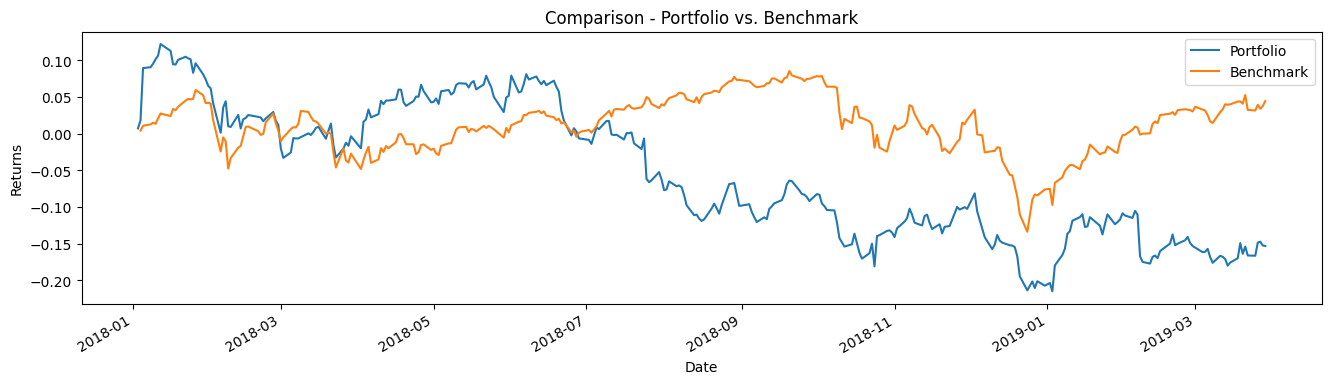

In [52]:
CumulativeReturns = ((1 + stocks_return[['Portfolio','Benchmark' ]]).cumprod()-1 )
CumulativeReturns.plot(figsize=(16,4 ))
_=plt.ylabel('Returns' )
_=plt.title('Comparison - Portfolio vs. Benchmark' )
_=plt.xlabel('Date' )
plt.show()

### • Create a scatterplot to identify the correlation between the portfolio and the benchmark

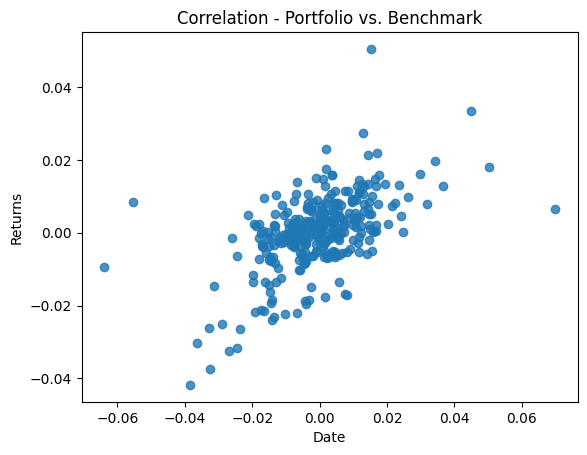

In [53]:
plt.scatter(stocks_return['Portfolio' ],stocks_return['Benchmark' ],alpha=0.80 );
_=plt.ylabel('Returns' )
_=plt.title('Correlation - Portfolio vs. Benchmark' )
_=plt.xlabel('Date' )

### • Create a new DataFrame for the portfolio and the benchmark for calculating the correlation

In [54]:
portfolio_benchmark = pd.concat([stocks_return['Portfolio' ],stocks_return['Benchmark' ]],axis=1 ).dropna()
portfolio_benchmark.columns=['Portfolio',' Benchmark' ]
portfolio_benchmark

,Portfolio,Benchmark
Date,,
2018-01-04,0.010994,0.004215
2018-01-05,0.069846,0.006664
2018-01-08,0.001061,0.001829
2018-01-09,0.004339,0.002263
2018-01-10,0.005553,-0.001530
...,...,...
2019-03-25,-0.000396,-0.000752
2019-03-26,0.021463,0.007454
2019-03-27,0.001477,-0.005229


### • Obtain the correlation between the portfolio and the benchmark


In [55]:
correlation=portfolio_benchmark.corr()
correlation

,Portfolio,Benchmark
Portfolio,1.000000,0.563609
Benchmark,0.563609,1.000000


### • Add risk-free rate based on the benchmark of Treasury Bills chosen


In [56]:
stocks_return['RF Rate' ]=0.0103
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103
...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103


### • Calculate the excess of the portfolio


In [57]:
stocks_return['excess' ]=stocks_return['Portfolio' ] - stocks_return['RF Rate' ]
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate,excess
Date,,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103,-0.003032
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103,0.000694
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103,0.059546
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103,-0.009239
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103,-0.005961
...,...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103,-0.010696
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103,0.011163
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103,-0.008823


### • Calculate the excess of the benchmark


In [58]:
stocks_return['excess_b' ]=stocks_return['Benchmark' ] - stocks_return['RF Rate' ]
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate,excess,excess_b
Date,,,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103,-0.003032,NaN
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103,0.000694,-0.006085
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103,0.059546,-0.003636
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103,-0.009239,-0.008471
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103,-0.005961,-0.008037
...,...,...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103,-0.010696,-0.011052
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103,0.011163,-0.002846
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103,-0.008823,-0.015529


### • Calculating the Sharpe Ratio


In [59]:
sharpe_ratio=((stocks_return['Portfolio' ].mean() - stocks_return['RF Rate' ].mean()))/stocks_return['Portfolio' ].std()
sharpe_ratio

-0.767341402428039

### • Calculating the annual Sharpe Ratio

In [60]:
import math
annual_days=252
sharpe_ratio_annual=sharpe_ratio * math.sqrt(annual_days)
sharpe_ratio_annual

-12.181167129048756

Considering that the results are negative, the problem lies that the mean return of the portfolio is smaller than the risk-free rate. As discussed before, the return of the portfolio is lower than the risk-free rate exemplifies that the portfolio is not performing above our lowest target (the RF Rate) and therefore a portfolio is not effective (Fig. 3).

By using highly correlated assets as a portfolio, returns were sacrificed and the risk was higher because if there is a fall in one security the other companies will respond in the same way. This is an important lesson when building a portfolio and not considering the warnings when analyzing correlation.

## TRAYNOR RATIO

The ratio was created by John Traynor in 1965 and measure the rentability compared to risk. The rule of thumb of the ratio is that an indicator that is higher is a result of the portfolio management. When analyzing the Traynor Ratio, if it is negative, the portfolio has underperformed the risk-free rate.

Since the Traynor Ratio measures returns in excess earned on a riskless investment compared by using a per market risk, it is useful because it compares the returns to the risk of the investor (Keaton 2020). As seen in the following equation, the main difference between a Sharpe Ratio and a Traynor Ratio is the use of beta.

Equation 11: Traynor Ratio

Traynor Ratio = (Rp − Rf) / βp

where:
Rp = returns of the portfolio

Rf = risk-free rate

βp = Beta of the portfolio

For example, the data set that was used for the Sharpe Ratio will be used. This is important for comparison between the ratios.

### • Installing packages


In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### • Creating the portfolio based on an end and start date

In [62]:
start = datetime.datetime(2018,1,2)
end = datetime.datetime(2019,4,1)
tickers = ['F','FCAU.VI', 'TM']
stocks = pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x, start, end)[ 'Close' ]
stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM
Date,,,
2018-01-02,12.66,15.205000,128.369995
2018-01-03,12.76,15.205000,130.130005
2018-01-04,12.98,15.205000,132.160004
2018-01-05,13.20,17.964001,133.860001
2018-01-08,13.15,17.964001,134.770004
...,...,...,...
2019-03-25,8.51,NaN,120.489998
2019-03-26,8.76,13.100000,121.769997
2019-03-27,8.62,13.450000,121.029999


### • Choose weights for the portfolio

In [63]:
portfolio_weights = np.array([0.33, 0.33, 0.34 ])
portfolio_weights

array([0.33, 0.33, 0.34])

### • Returns of the stocks using percent change

In [64]:
stocks_return=stocks.pct_change(1).dropna()
stocks_return

C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\2946317190.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_return=stocks.pct_change(1).dropna()


,F,FCAU.VI,TM
Date,,,
2018-01-03,0.007899,0.000000,0.013710
2018-01-04,0.017241,0.000000,0.015600
2018-01-05,0.016949,0.181454,0.012863
2018-01-08,-0.003788,0.000000,0.006798
2018-01-09,-0.005323,0.026497,-0.007791
...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246
2019-03-26,0.029377,0.024718,0.010623
2019-03-27,-0.015982,0.026718,-0.006077


### • Multiply the returns of the portfolio with each stock’s weight

In [65]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1 )
weighted_returns_portfolio

,F,FCAU.VI,TM
Date,,,
2018-01-03,0.002607,0.000000,0.004662
2018-01-04,0.005690,0.000000,0.005304
2018-01-05,0.005593,0.059880,0.004373
2018-01-08,-0.001250,0.000000,0.002311
2018-01-09,-0.001757,0.008744,-0.002649
...,...,...,...
2019-03-25,-0.001159,0.000000,0.000764
2019-03-26,0.009694,0.008157,0.003612
2019-03-27,-0.005274,0.008817,-0.002066


### • Create a variable for the portfolio by calculating the sum of the returns

In [66]:
stocks_return['Portfolio' ] = weighted_returns_portfolio.sum(axis = 1 ).dropna()
stocks_return.tail()

,F,FCAU.VI,TM,Portfolio
Date,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396
2019-03-26,0.029377,0.024718,0.010623,0.021463
2019-03-27,-0.015982,0.026718,-0.006077,0.001477
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094
2019-03-29,0.001140,0.005458,-0.008818,-0.000821


### • Add the benchmark by using the S&P 500 and calculating the returns

In [67]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
stocks_return['Benchmark' ]=yf.download('SPY',start,end)[ 'Close' ]
stocks_return['Benchmark' ] = stocks_return['Benchmark' ].pct_change(1).dropna()
stocks_return.dropna().tail()

[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM,Portfolio,Benchmark
Date,,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094,0.003790
2019-03-29,0.001140,0.005458,-0.008818,-0.000821,0.006306


### • Obtaining the cumulative returns and plotting the portfolio

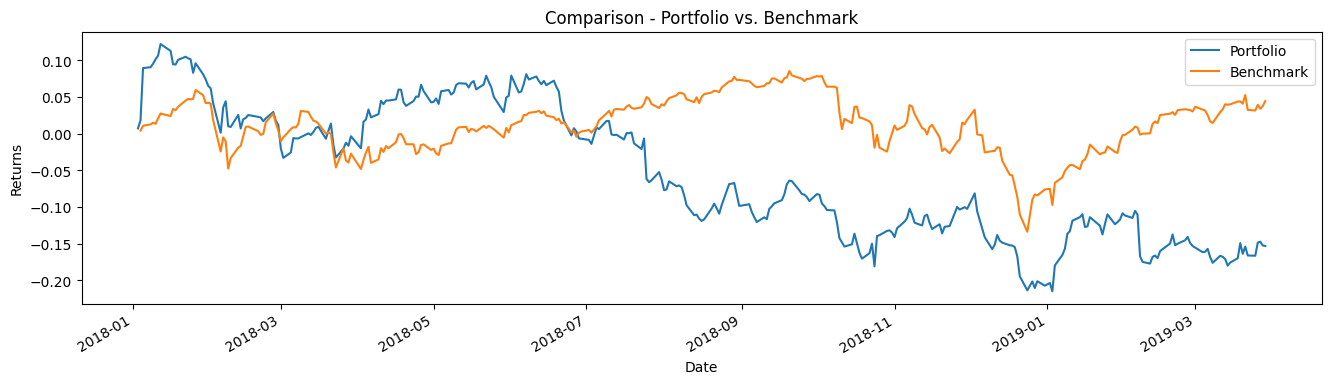

In [68]:
CumulativeReturns = ((1 + stocks_return[['Portfolio','Benchmark' ]]).cumprod()-1 )
CumulativeReturns.plot(figsize=(16,4 ))
_=plt.ylabel('Returns' )
_=plt.title('Comparison - Portfolio vs. Benchmark' )
_=plt.xlabel('Date' )
plt.show()

### • Add risk-free rate based on the benchmark of Treasury Bills chosen

In [69]:
stocks_return['RF Rate' ]=0.0103
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103
...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103


### • Calculate the covariance of the stocks

In [70]:
covariance=stocks_return.cov() * 252
covariance

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
F,0.081751,0.037082,0.023899,0.047341,0.023779,0.0
FCAU.VI,0.037082,0.169625,0.019607,0.074880,0.018771,0.0
TM,0.023899,0.019607,0.035621,0.026468,0.019697,0.0
Portfolio,0.047341,0.074880,0.026468,0.049332,0.020739,0.0
Benchmark,0.023779,0.018771,0.019697,0.020739,0.027384,0.0
RF Rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### • Calculate the covariance between the market and the portfolio


In [71]:
covariance_market=covariance.iloc[3,4 ]
covariance_market

0.020738632277716246

### • Calculate the variance of the benchmark

In [72]:
market_variance=stocks_return['Benchmark' ].var() * 252
market_variance

0.027384176591305334

### • Calculate the beta of the portfolio

In [73]:
portfolio_beta=covariance_market / market_variance
portfolio_beta

0.757321740479168

In [74]:
traynor_ratio = ((stocks_return['Portfolio'].mean() - stocks_return['RF Rate' ].mean()))/portfolio_beta
traynor_ratio

-0.014176597833406235

As a result, the Traynor Ratio is negative, which means that the portfolio is not performing better than the risk-free rate. The result of the Sharpe Ratio was negative also, so it complements the information given by Traynor. The main difference between the Sharpe and the Traynor ratio is that it compares with the beta and not the volatility (Fig. 4).

## JENSEN’S MEASURE

The Jensen’s Measure also known as alpha was created in 1968 with the purpose of measuring the relationship between the return of the portfolio in comparison with another portfolio return with the same risk, same reference market and under the same parameters (Chen 2019).

Equation 12: Jensen’s measure

    Alpha (α) = Rp − (Rf + βp (Rm − Rp))

Rp = returns of the portfolio

Rf = risk-free rate

βp = Beta of the portfolio

Rm = return of the market.

### • Installing packages

In [75]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


### • Creating the portfolio based on an end and start date

In [76]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
tickers = ['F','FCAU.VI', 'TM']
stocks = pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x,start,end)[ 'Close' ]
stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM
Date,,,
2018-01-02,12.66,15.205000,128.369995
2018-01-03,12.76,15.205000,130.130005
2018-01-04,12.98,15.205000,132.160004
2018-01-05,13.20,17.964001,133.860001
2018-01-08,13.15,17.964001,134.770004
...,...,...,...
2019-03-25,8.51,NaN,120.489998
2019-03-26,8.76,13.100000,121.769997
2019-03-27,8.62,13.450000,121.029999


### • Choose weights for the portfolio

In [77]:
portfolio_weights = np.array([0.33, 0.33, 0.34 ])
portfolio_weights

array([0.33, 0.33, 0.34])

### • Returns of the stocks using percent change

In [78]:
stocks_return=stocks.pct_change(1 ).dropna()
stocks_return

C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\697486859.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_return=stocks.pct_change(1 ).dropna()


,F,FCAU.VI,TM
Date,,,
2018-01-03,0.007899,0.000000,0.013710
2018-01-04,0.017241,0.000000,0.015600
2018-01-05,0.016949,0.181454,0.012863
2018-01-08,-0.003788,0.000000,0.006798
2018-01-09,-0.005323,0.026497,-0.007791
...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246
2019-03-26,0.029377,0.024718,0.010623
2019-03-27,-0.015982,0.026718,-0.006077


### • Multiply the returns of the portfolio with each stock’s weight

In [79]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1 )
weighted_returns_portfolio

,F,FCAU.VI,TM
Date,,,
2018-01-03,0.002607,0.000000,0.004662
2018-01-04,0.005690,0.000000,0.005304
2018-01-05,0.005593,0.059880,0.004373
2018-01-08,-0.001250,0.000000,0.002311
2018-01-09,-0.001757,0.008744,-0.002649
...,...,...,...
2019-03-25,-0.001159,0.000000,0.000764
2019-03-26,0.009694,0.008157,0.003612
2019-03-27,-0.005274,0.008817,-0.002066


### • Create a variable for the portfolio by calculating the sum of the returns

In [80]:
stocks_return['Portfolio' ] = weighted_returns_portfolio.sum(axis = 1 ).dropna()
stocks_return.tail()

,F,FCAU.VI,TM,Portfolio
Date,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396
2019-03-26,0.029377,0.024718,0.010623,0.021463
2019-03-27,-0.015982,0.026718,-0.006077,0.001477
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094
2019-03-29,0.001140,0.005458,-0.008818,-0.000821


### • Add the benchmark by using the S&P 500 and calculating the returns

In [81]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
stocks_return['Benchmark' ]=yf.download('SPY',start,end)[ 'Close' ]
stocks_return['Benchmark' ] = stocks_return['Benchmark' ].pct_change(1).dropna()
stocks_return.dropna().tail()

[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM,Portfolio,Benchmark
Date,,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094,0.003790
2019-03-29,0.001140,0.005458,-0.008818,-0.000821,0.006306


### • Add risk-free rate based on the benchmark of Treasury Bills chosen

In [82]:
stocks_return['RF Rate' ]=0.0103
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103
...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103


### • Calculate the covariance of the stocks

In [83]:
covariance=stocks_return.cov() * 252
covariance

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
F,0.081751,0.037082,0.023899,0.047341,0.023779,0.0
FCAU.VI,0.037082,0.169625,0.019607,0.074880,0.018771,0.0
TM,0.023899,0.019607,0.035621,0.026468,0.019697,0.0
Portfolio,0.047341,0.074880,0.026468,0.049332,0.020739,0.0
Benchmark,0.023779,0.018771,0.019697,0.020739,0.027384,0.0
RF Rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### • Choose the covariance between the market and the portfolio

In [84]:
covariance_market=covariance.iloc[3,4 ]
covariance_market

0.020738632277716246

### • Calculate the variance of the benchmark

In [85]:
market_variance=stocks_return['Benchmark' ].var() * 252
market_variance

0.027384176591305334

### • Calculate the beta of the portfolio

In [86]:
portfolio_beta=covariance_market / market_variance
portfolio_beta

0.757321740479168

### • Calculate the return of the portfolio

In [87]:
portfolio_return=stocks_return['Portfolio' ].mean()
portfolio_return

-0.00043624574526841207

### • Calculate the risk-free rate

In [88]:
risk_free_rate=stocks_return['RF Rate' ].mean()
risk_free_rate

0.010300000000000002

### • Calculate the Alpha

In [89]:
alpha=portfolio_return - (risk_free_rate+portfolio_beta *(portfolio_return - risk_free_rate))
alpha

-0.0026054534312496764

The alpha is negative and so is the Traynor and the Sharpe Ratio. This is a perfect example of a portfolio that is performing negatively when compared to the risk-free rate. For decision making with alpha the following table is important (Table 6):

Table 6 Alpha decision making

(α) > 0 the portfolio has gained value

(α) < 0 the portfolio has lost value

## INFORMATION RATIO

The information ratio analyzes the excess of the return when comparing the portfolio without risk with the one supported by the investment. The effect that the ratio measures is how the portfolio deviates from the benchmark (Murphy 2019) The name is based on the consideration that the manager of the portfolio has special information and therefore, he will out beat the benchmark. The formula is as follows:

    Information Ratio = (Rp − Rm) / TE

TE = standard deviation of the difference between the portfolio and the benchmark

Rp = Porfolio Return

βp = Beta of the portfolio

Rm = return of the market

### • Installing packages


In [90]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### • Creating the portfolio based on an end and start date

In [91]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
tickers = ['F','FCAU.VI', 'TM']
stocks = pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(x, start, end)[ 'Close' ]
stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM
Date,,,
2018-01-02,12.66,15.205000,128.369995
2018-01-03,12.76,15.205000,130.130005
2018-01-04,12.98,15.205000,132.160004
2018-01-05,13.20,17.964001,133.860001
2018-01-08,13.15,17.964001,134.770004
...,...,...,...
2019-03-25,8.51,NaN,120.489998
2019-03-26,8.76,13.100000,121.769997
2019-03-27,8.62,13.450000,121.029999


### • Choose weights for the portfolio

In [92]:
portfolio_weights = np.array([0.33, 0.33, 0.34 ])
portfolio_weights

array([0.33, 0.33, 0.34])

### Returns of the stocks using percent change

In [93]:
stocks_return=stocks.pct_change(1 ).dropna()
stocks_return

C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\697486859.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_return=stocks.pct_change(1 ).dropna()


,F,FCAU.VI,TM
Date,,,
2018-01-03,0.007899,0.000000,0.013710
2018-01-04,0.017241,0.000000,0.015600
2018-01-05,0.016949,0.181454,0.012863
2018-01-08,-0.003788,0.000000,0.006798
2018-01-09,-0.005323,0.026497,-0.007791
...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246
2019-03-26,0.029377,0.024718,0.010623
2019-03-27,-0.015982,0.026718,-0.006077


### • Multiply the returns of the portfolio with each stock’s weight

In [94]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1 )
weighted_returns_portfolio

,F,FCAU.VI,TM
Date,,,
2018-01-03,0.002607,0.000000,0.004662
2018-01-04,0.005690,0.000000,0.005304
2018-01-05,0.005593,0.059880,0.004373
2018-01-08,-0.001250,0.000000,0.002311
2018-01-09,-0.001757,0.008744,-0.002649
...,...,...,...
2019-03-25,-0.001159,0.000000,0.000764
2019-03-26,0.009694,0.008157,0.003612
2019-03-27,-0.005274,0.008817,-0.002066


### • Create a variable for the portfolio by calculating the sum of the returns.

In [95]:
stocks_return['Portfolio' ] = weighted_returns_portfolio.sum(axis = 1 ).dropna()
stocks_return.tail()

,F,FCAU.VI,TM,Portfolio
Date,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396
2019-03-26,0.029377,0.024718,0.010623,0.021463
2019-03-27,-0.015982,0.026718,-0.006077,0.001477
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094
2019-03-29,0.001140,0.005458,-0.008818,-0.000821


### • Add the benchmark by using the S&P 500 and calculating the returns

In [96]:
start = datetime.datetime(2018, 1, 2 )
end = datetime.datetime(2019, 4, 1 )
stocks_return['Benchmark' ]=yf.download('SPY',start,end)['Close' ]
stocks_return['Benchmark' ] = stocks_return['Benchmark' ].pct_change(1).dropna()
stocks_return.dropna().tail()

[*********************100%%**********************]  1 of 1 completed


,F,FCAU.VI,TM,Portfolio,Benchmark
Date,,,,,
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229
2019-03-28,0.017401,-0.019182,-0.016194,-0.006094,0.003790
2019-03-29,0.001140,0.005458,-0.008818,-0.000821,0.006306


### • Add risk-free rate based on the benchmark of Treasury Bills chosen

In [97]:
stocks_return['RF Rate' ]=0.0103
stocks_return

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2018-01-03,0.007899,0.000000,0.013710,0.007268,NaN,0.0103
2018-01-04,0.017241,0.000000,0.015600,0.010994,0.004215,0.0103
2018-01-05,0.016949,0.181454,0.012863,0.069846,0.006664,0.0103
2018-01-08,-0.003788,0.000000,0.006798,0.001061,0.001829,0.0103
2018-01-09,-0.005323,0.026497,-0.007791,0.004339,0.002263,0.0103
...,...,...,...,...,...,...
2019-03-25,-0.003513,0.000000,0.002246,-0.000396,-0.000752,0.0103
2019-03-26,0.029377,0.024718,0.010623,0.021463,0.007454,0.0103
2019-03-27,-0.015982,0.026718,-0.006077,0.001477,-0.005229,0.0103


### • Calculate the covariance of the stocks

In [98]:
covariance=stocks_return.cov() * 252
covariance

,F,FCAU.VI,TM,Portfolio,Benchmark,RF Rate
F,0.081751,0.037082,0.023899,0.047341,0.023779,0.0
FCAU.VI,0.037082,0.169625,0.019607,0.074880,0.018771,0.0
TM,0.023899,0.019607,0.035621,0.026468,0.019697,0.0
Portfolio,0.047341,0.074880,0.026468,0.049332,0.020739,0.0
Benchmark,0.023779,0.018771,0.019697,0.020739,0.027384,0.0
RF Rate,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### • Choose the covariance between the market and the portfolio

In [99]:
covariance_market=covariance.iloc[3,4 ]
covariance_market

0.020738632277716246

### • Calculate the variance of the benchmark

In [100]:
market_variance=stocks_return['Benchmark' ].var() * 252
market_variance

0.027384176591305334

### • Calculate the beta of the portfolio

In [101]:
portfolio_return=stocks_return['Portfolio' ].mean()
portfolio_return

-0.00043624574526841207

### • Calculate the return of the benchmark

In [102]:
benchmark_return=stocks_return['Benchmark' ].mean()
benchmark_return

0.0001944661846185702

### • Difference between the return of the portfolio and the benchmark

In [103]:
difference_benchmark_portfolio=stocks_return['Portfolio'] - stocks_return['Benchmark' ]
difference_benchmark_portfolio

Date
2018-01-03         NaN
2018-01-04    0.006779
2018-01-05    0.063182
2018-01-08   -0.000767
2018-01-09    0.002075
                ...   
2019-03-25    0.000356
2019-03-26    0.014009
2019-03-27    0.006706
2019-03-28   -0.009884
2019-03-29   -0.007126
Length: 311, dtype: float64

### • Calculate the tracking error

In [104]:
tracking_error=difference_benchmark_portfolio.std()
tracking_error

0.011843880944600855

### Calculate the information

In [105]:
information_ratio=((portfolio_return - benchmark_return))/ tracking_error
information_ratio

-0.05325213355631527

The result demonstrates that there is no excess between the returns of the portfolio and the benchmark leading to infer that the benchmark has outperformed the portfolio. As a conclusion concerning the ratios, the portfolio has performed worse than the risk-free rate and the benchmark.

## • Applying the knowledge to an investment

The following exercise is based on an investment of USD 300,000 in the following securities with a specific allocation:

– Amazon        30% allocation      —USD 90,0000

– Ford          20% allocation      —USD 60,000

– Citi          30% allocation      —USD 90,000

– McDonalds     20%                 —USD 60,000

### • Installing packages

In [106]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### • Retrieving the information concerning the securities

In [107]:
start = datetime.datetime(2019, 1, 2 )
end = datetime.datetime(2020, 4, 1 )
Amazon=yf.download('AMZN', start, end)
Ford=yf.download('F', start, end)
Citi=yf.download('C', start, end)
McDonalds=yf.download('MCD', start, end)





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### • Calculating the returns for the portfolio using closing price

In [108]:
for securities in (Amazon,Ford,Citi,McDonalds):
    securities['Return' ]=securities['Close' ] /securities.iloc[0 ][ 'Close' ]
securities

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2019-01-02,175.410004,176.300003,174.169998,176.059998,156.829605,2571500,1.000000
2019-01-03,175.449997,176.449997,174.410004,174.899994,155.796310,3728200,0.993411
2019-01-04,176.029999,179.199997,175.690002,178.279999,158.807159,3194300,1.012609
2019-01-07,178.139999,181.880005,178.139999,180.220001,160.535248,3283000,1.023628
2019-01-08,181.960007,182.289993,179.910004,180.600006,160.873734,2941400,1.025787
...,...,...,...,...,...,...,...
2020-03-25,165.000000,171.360001,159.220001,162.979996,149.612488,9708700,0.925707
2020-03-26,163.990005,170.929993,161.000000,167.350006,153.624054,8259900,0.950528
2020-03-27,162.779999,169.740005,159.220001,164.009995,150.557983,6441400,0.931557


### • Calculating the returns for the portfolio using closing price

In [109]:
for securities , allocation in zip((Amazon,Ford,Citi,McDonalds),[.3,.2,.3,.2]):
    securities['Allocation']=securities['Return']*allocation
securities

,Open,High,Low,Close,Adj Close,Volume,Return,Allocation
Date,,,,,,,,
2019-01-02,175.410004,176.300003,174.169998,176.059998,156.829605,2571500,1.000000,0.200000
2019-01-03,175.449997,176.449997,174.410004,174.899994,155.796310,3728200,0.993411,0.198682
2019-01-04,176.029999,179.199997,175.690002,178.279999,158.807159,3194300,1.012609,0.202522
2019-01-07,178.139999,181.880005,178.139999,180.220001,160.535248,3283000,1.023628,0.204726
2019-01-08,181.960007,182.289993,179.910004,180.600006,160.873734,2941400,1.025787,0.205157
...,...,...,...,...,...,...,...,...
2020-03-25,165.000000,171.360001,159.220001,162.979996,149.612488,9708700,0.925707,0.185141
2020-03-26,163.990005,170.929993,161.000000,167.350006,153.624054,8259900,0.950528,0.190106
2020-03-27,162.779999,169.740005,159.220001,164.009995,150.557983,6441400,0.931557,0.186311


For the first time the function zip() is used in the present book. The reason for this is that it allows an iteration between the variables. In this case the allocation and the return.

### • Establishing the investment based on the investment of USD 300,000

In [110]:
for securities in (Amazon,Ford,Citi,McDonalds):
    securities['Investment']=securities['Allocation']* 300000
securities.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Allocation,Investment
Date,,,,,,,,,
2020-03-25,165.000000,171.360001,159.220001,162.979996,149.612488,9708700,0.925707,0.185141,55542.428032
2020-03-26,163.990005,170.929993,161.000000,167.350006,153.624054,8259900,0.950528,0.190106,57031.696612
2020-03-27,162.779999,169.740005,159.220001,164.009995,150.557983,6441400,0.931557,0.186311,55893.444319
2020-03-30,164.919998,170.309998,163.570007,168.130005,154.340088,5621700,0.954959,0.190992,57297.514670
2020-03-31,166.839996,169.509995,165.000000,165.350006,151.788101,4519900,0.939169,0.187834,56350.110779


### • Investment per security chosen

In [111]:
all_investments=[Amazon['Investment'],Ford['Investment'],Citi['Investment'],McDonalds['Investment']]
value_of_portfolio=pd.concat(all_investments,axis=1)
value_of_portfolio.columns=['Amazon Investment','Ford Investment','Citi Investment','McDonalds Investment']
value_of_portfolio.head()

,Amazon Investment,Ford Investment,Citi Investment,McDonalds Investment
Date,,,,
2019-01-02,90000.000000,60000.000000,90000.000000,60000.000000
2019-01-03,87728.265199,59088.608475,88369.143125,59604.678969
2019-01-04,92120.292952,61367.087287,92690.084238,60756.560690
2019-01-07,95284.939528,62962.024267,93497.107586,61417.699780
2019-01-08,96867.847241,63569.618617,93244.909984,61547.202752


### • Analyzing the positions

In [112]:
value_of_portfolio['Total Investment']=value_of_portfolio.sum(axis=1)
value_of_portfolio.tail()

,Amazon Investment,Ford Investment,Citi Investment,McDonalds Investment,Total Investment
Date,,,,,
2020-03-25,110273.729875,40936.707353,70379.229233,55542.428032,277132.094492
2020-03-26,114346.483270,39873.417240,77373.437991,57031.696612,288625.035113
2020-03-27,111107.574601,39417.721478,73640.949397,55893.444319,280059.689795
2020-03-30,114841.183197,38202.532778,74111.717827,57297.514670,284452.948472
2020-03-31,114009.087284,36683.543282,70816.364474,56350.110779,277859.105819


### • Plotting the value of the portfolio

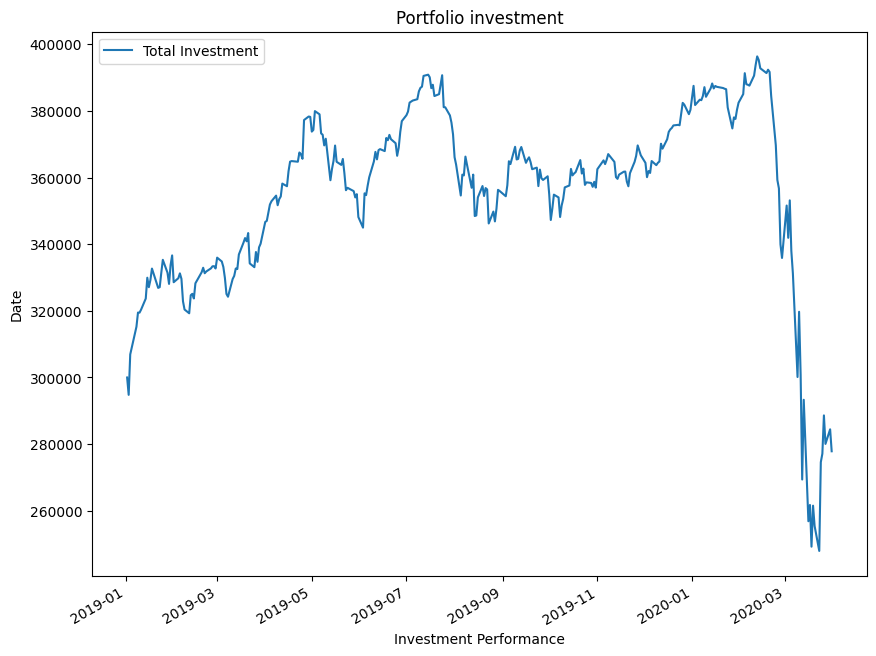

In [113]:
value_of_portfolio['Total Investment' ].plot(figsize=(10,8 ))
_=plt.xlabel('Investment Performance' )
_=plt.ylabel('Date' )
_=plt.title('Portfolio investment' )
plt.legend();

As it can observed in Fig. 23 in Chapter 6, the portfolio began with the investment of USD 300,000 and reached its highest value at USD369,373 and its lowest value at USD247,946.82. To calculate this values, it can be done with the min() and max() values (Fig. 5).

In [114]:
print(value_of_portfolio['Total Investment'].max())

print(value_of_portfolio['Total Investment'].min())


396373.78229428676
247946.83931260288


### • Plotting the behavior of each security

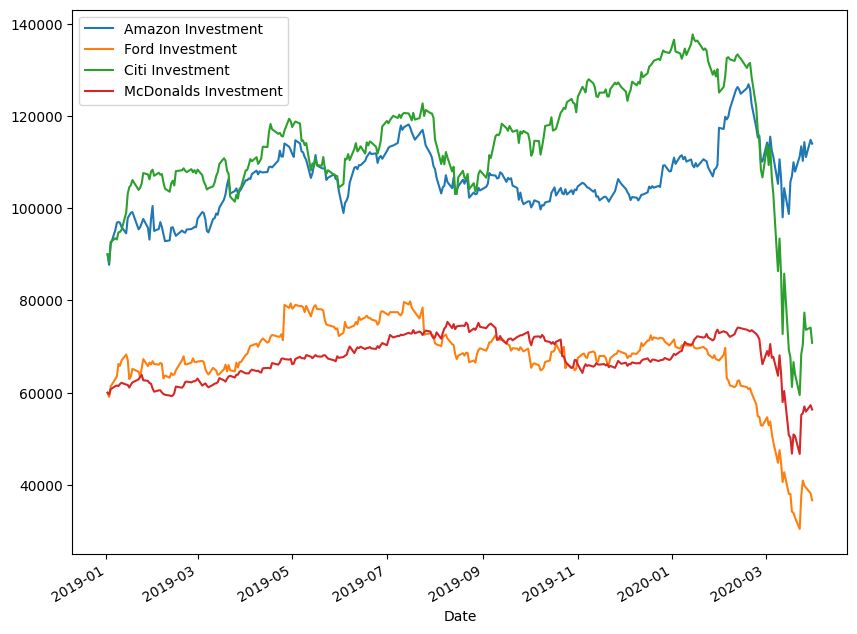

In [115]:
value_of_portfolio.drop('Total Investment' ,axis=1).plot(figsize=(10,8 ));

In Fig. 24 in Chapter 6, it can be observed that the only security that is gaining is Amazon, McDonald’s, Citi and Ford have had a fall losing value in the portfolio (Fig. 6)

### • Calculating the Daily Returns


In [116]:
value_of_portfolio['Daily Returns' ] = value_of_portfolio['Total Investment' ].pct_change(1)
value_of_portfolio

,Amazon Investment,Ford Investment,Citi Investment,McDonalds Investment,Total Investment,Daily Returns
Date,,,,,,
2019-01-02,90000.000000,60000.000000,90000.000000,60000.000000,300000.000000,NaN
2019-01-03,87728.265199,59088.608475,88369.143125,59604.678969,294790.695768,-0.017364
2019-01-04,92120.292952,61367.087287,92690.084238,60756.560690,306934.025168,0.041193
2019-01-07,95284.939528,62962.024267,93497.107586,61417.699780,313161.771160,0.020290
2019-01-08,96867.847241,63569.618617,93244.909984,61547.202752,315229.578593,0.006603
...,...,...,...,...,...,...
2020-03-25,110273.729875,40936.707353,70379.229233,55542.428032,277132.094492,0.009241
2020-03-26,114346.483270,39873.417240,77373.437991,57031.696612,288625.035113,0.041471
2020-03-27,111107.574601,39417.721478,73640.949397,55893.444319,280059.689795,-0.029676


### • Calculating the mean of the Daily Returns

In [117]:
value_of_portfolio['Daily Returns' ].mean()

-6.083625549172171e-05

### • Calculating the standard deviation of the Daily Returns

In [118]:
value_of_portfolio['Daily Returns' ].std()

0.019076539122799406

### • Calculating the cumulative returns of the portfolio

In [119]:
cumulative_return=100 * (value_of_portfolio['Total Investment' ][-1]/value_of_portfolio['Total Investment' ][0]-1)
cumulative_return

C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\761605794.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return=100 * (value_of_portfolio['Total Investment' ][-1]/value_of_portfolio['Total Investment' ][0]-1)


-7.380298060225188

The loss of the portfolio is of negative 12%. This can be analyzed based on the cumulative returns since the beginning of the portfolio.

### • Value of the portfolio to date

In [120]:
value_of_portfolio['Total Investment' ][-1]


C:\Users\fvill\AppData\Local\Temp\ipykernel_18132\2787497824.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_of_portfolio['Total Investment' ][-1]


277859.10581932444

The portfolio of USD 300,000 has fallen to USD 263,619.78 which is equivalent to a 12.12% fall based on the Covid-19 crisis.